In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import gensim
from gensim.models import word2vec  
from sklearn.manifold import TSNE  
import re  
import nltk  
from nltk.corpus import stopwords  
from nltk.stem.porter import *  
stemmer = PorterStemmer()  

In [2]:
data = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv',delimiter = ',')
df = pd.DataFrame(data)
df.head()
df.shape[0]
df

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


In [3]:
def rewiew_to(raw):
    if isinstance(raw,float):
        raw = str(raw)
    letters_only = re.sub("[^a-zA-Z]", " ",raw)
    words = letters_only.lower().split()
    stops = set(stopwords.words("english"))
    m_words = [w for w in words if not w in stops]
    singles = [stemmer.stem(word) for word in m_words]
    return (" ".join(singles))

In [4]:
proc = [rewiew_to(text) for text in df["Summary"]]

In [53]:
df["Tokin"] = proc
df.to_csv("new_crash.csv")

In [5]:
def str_to_lst(text):
    res = []
    for elem in text:
        res.append([w for w in elem.split()])
    return res

In [6]:
res = str_to_lst(proc)

In [13]:
model = word2vec.Word2Vec(res, window=5, min_count=100, workers=4)  
len(model.wv)

166

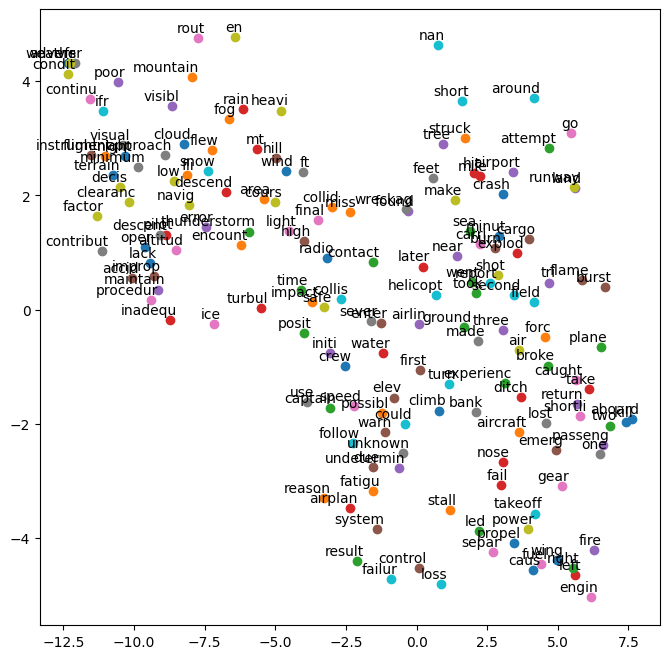

In [14]:
def show_model(model):
    labeles = []
    tokens = []
    for word in model.wv.key_to_index:
        tokens.append(model.wv[word])
        labeles.append(word)
    tokens = np.array(tokens)
    tsne_model = TSNE(perplexity=40, n_components=2,init='pca', max_iter=2500)
    new_values = tsne_model.fit_transform(tokens)
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    plt.figure(figsize=(8,8))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labeles[i],xy = (x[i],y[i]),xytext = (5,2),
        textcoords= 'offset points',ha = 'right',va = 'bottom')
    plt.show()
        
        
show_model(model)

In [18]:
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.feature import HashingTF, Tokenizer
from pyspark.sql.functions import UserDefinedFunction
from pyspark.sql.types import *
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import pyspark.sql.functions as sf
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.regression import GBTRegressor
#other types of regression models
#можно использовать и другие виды регрессии
#from pyspark.ml.regression import LinearRegression
#from pyspark.ml.regression import RandomForestRegressor
#from pyspark.ml.regression import GeneralizedLinearRegression
#from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator

In [44]:
from pyspark import SparkContext, SparkConf, HiveContext
from pyspark.sql.functions import col, asc, desc


# запуск сессии спарка
spark = SparkSession.builder.config(conf=conf).enableHiveSupport().getOrCreate()
spark

In [55]:
nd  = spark.read.csv("new_crash.csv", sep=",",inferSchema=True, header=True)
m = nd.select(col("Tokin"))
m.show()

+--------------------+
|               Tokin|
+--------------------+
|demonstr flight u...|
|first u dirig akr...|
|first fatal airpl...|
|airship flew thun...|
|hydrogen ga vent ...|
|crash tree attemp...|
|explod burn near ...|
|crash near black ...|
|shot british airc...|
|shot flame britis...|
|         crash storm|
|shot british anti...|
|   caught fire crash|
|struck lightn cra...|
|crash sea altitud...|
|shot british airc...|
|shot british airc...|
|shot french anti ...|
|explod crash sea ...|
|shot british airc...|
+--------------------+
only showing top 20 rows



In [57]:
Tokenizer = Tokenizer(inputCol = 'prep_text', outputCol = 'tokens')

hashingTF = HashingTF(inputCol = 'clear_tokens', outputCol = 'rawFeatures')
idf = IDF(inputCol = 'rawFeatures', outputCol = 'TfIdfFeatures', minDocFreq = 5)

word2Vec = Word2Vec(inputCol = 'clear_tokens', outputCol = 'Word2VecFeatures')

countVec = CountVectorizer(inputCol = 'clear_tokens', 
                           outputCol = 'CountVectFeatures')

pipeline = Pipeline(stages = [regexTokenizer, stopwordsRemover, 
  				     hashingTF, idf, word2Vec, countVec])
# применяем наш pipeline
pipeline_fit = pipeline.fit(t)
t = pipeline_fit.transform(t)

TypeError: 'Tokenizer' object is not callable